In [10]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

# Mathematical Background

## Euclidean Distance

- $d = \sqrt{(y_{2} - y_{1})^{2} - (x_{2} - x_{1})^{2}}$

# k-Neighbors classification

- <b>In its simplest version</b>, the k-NN algorithm only considers exactly <b>one nearest neighbor</b>, which is the <b>closest</b> training data point to the point we want to make a prediction for.
- The prediction is then simply the <b>known output</b> for this training point.

/home/muhammad/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


<IPython.core.display.Javascript object>


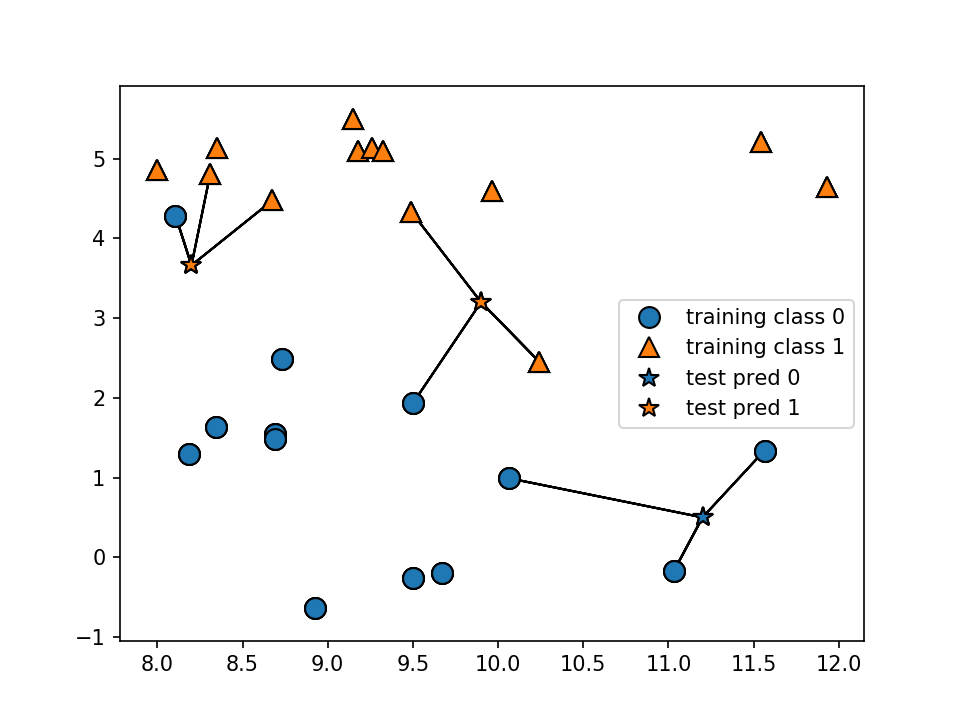

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

- Instead of considering only the closest neighbor, we can also consider an <b>arbitrary number</b>, <b>k</b>, of neighbors.
- This is where the <b>name</b> of the k-nearest neighbors algorithm comes from.
- When considering more than one neighbor, we use <b>voting</b> to assign a label.
- This means that for each test point, we <b>count</b> how many neighbors belong to <b>class 0</b> and how many neighbors belong to <b>class 1</b>. 
- We then assign the class that is <b>more frequent</b>: in other words, the <b>majority class</b> among the k-nearest neighbors.

/home/muhammad/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


<IPython.core.display.Javascript object>


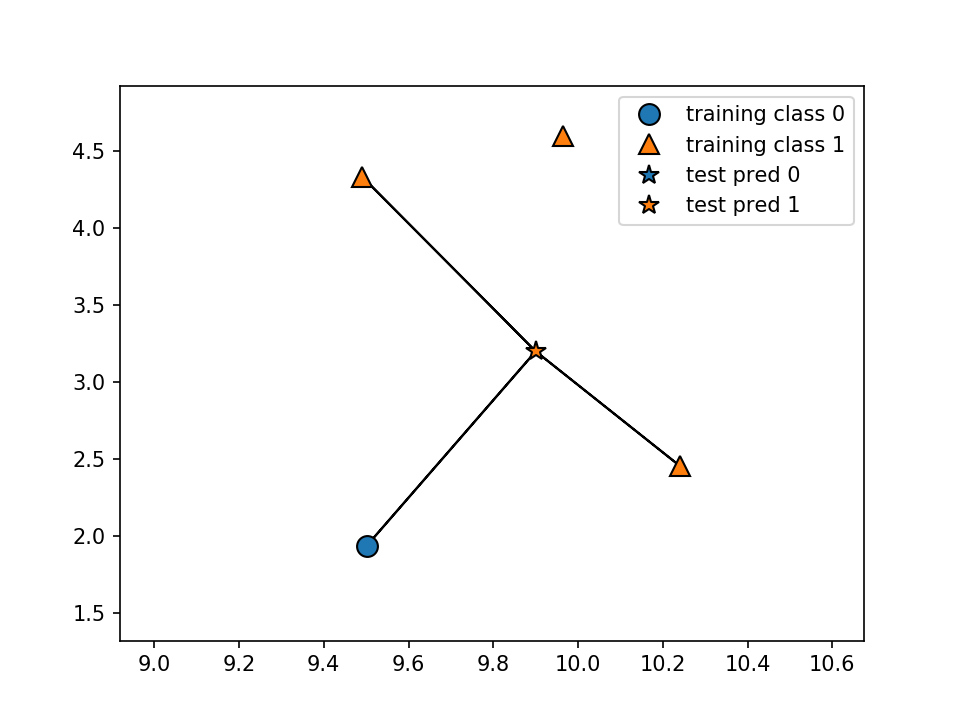

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

# Real-World Example

- Let’s assume that a hobby botanist is interested in <b>distinguishing the species</b> of some iris flowers that she has found.
- She has collected some <b>measurements</b> associated with each iris: the length and width of the <b>petals</b> and the length and width of the <b>sepals</b>, all measured in <b>centimeters</b>

<img src="Iris.png">

- She also has the measurements of some irises that have been previously identified by an expert botanist as belonging to the species:
    1. <b>Setosa</b>
    2. <b>Versicolor</b> 
    3. <b>Virginica</b>.

- Because we have measurements for which we know the correct species of iris, this is a <b>supervised learning</b> problem.
- In this problem, we want to predict one of several options (the species of iris). This is an example of a <b>classification</b> problem.
- The possible outputs (different species of irises) are called <b>classes</b>.
- Every iris in the dataset belongs to one of three classes, so this problem is a <b>three-class classification problem</b>.
- The desired output for a single <b>data point</b> (<b>an iris</b>) is the species of this flower.
- For a particular data point, the species it belongs to is called its <b>label</b>.

# Meet the Data

- The data we will use for this example is the <b>Iris dataset</b>, a classical dataset in machine learning and statistics.
- It is included in scikit-learn in the <b>datasets</b> module.
- We can load it by calling the <b>load_iris</b> function:

In [2]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

- The iris object that is returned by load_iris is a <b>Bunch object</b>, which is very similar to a <b>dictionary</b>.
- It contains <b>keys</b> and <b>values</b>:

## Description

- The value of the key <b>DESCR</b> is a <b>short description</b> of the dataset.

In [4]:
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Display as Pandas DataFrame

In [6]:
iris_df = pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names)

In [7]:
display(iris_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


# Measuring Success: Training and Testing Data

- To assess the model’s performance, we show it new data (data that it hasn’t seen before) for which we have labels.
- This is usually done by splitting the labeled data we have collected (here, our 150 flower measurements) into two parts. 
- One part of the data is used to build our machine learning model, and is called the training data or training set.
- The rest of the data will be used to assess how well the model works; this is called the test data, test set, or hold-out set.

- scikit-learn contains a function that <b>shuffles</b> the dataset and splits it for you: the <b>train_test_split</b> function.
- This function extracts <b>75%</b> of the rows in the data as the training set, together with the corresponding labels for this data. 
- The remaining <b>25%</b> of the data, together with the remaining labels, is declared as the test set.

- In scikit-learn , data is usually denoted with a capital $X$ , while labels are denoted by a lowercase $y$ .
- This is inspired by the standard formulation $f(x)=y$ in mathematics, where $x$ is the input to a function and $y$ is the output.
- Following more conventions from mathematics, we use a capital $X$ because the data is a two-dimensional array (a <b>matrix</b>) and a lowercase $y$ because the target is a one-dimensional array (a <b>vector</b>).

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state = 0)

# k-Nearest Neighbors

- To make a prediction for a new data point, the algorithm finds the point in the training set that is closest to the new point.
- Then it assigns the label of this training point to the new data point.
- The $k$ in $k$-nearest neighbors signifies that instead of using only the closest neighbor to the new data point, we can consider any fixed number $k$ of neighbors in the training (for example, the closest three or five neighbors). 
- Then, we can make a prediction using the majority class among these neighbors.
- For now, we’ll use only a single neighbor.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

- To build the model on the training set, we call the fit method of the knn object, which takes as arguments the NumPy array X_train containing the training data and the NumPy array y_train of the corresponding training labels:

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

# Making Predictions

- Imagine we found an iris in the wild with a sepal length of 5 cm, a sepal width of 2.9 cm, a petal length of 1 cm, and a petal width of 0.2 cm. What species of iris would this be?
- We can put this data into a NumPy array, again by calculating the shape—that is, the number of samples (1) multiplied by the number of features (4)

In [21]:
X_new = np.array([ [5, 2.9, 1, 0.2] ])

- Note that we made the measurements of this single flower into a row in a two-dimensional NumPy array, as scikit-learn always expects two-dimensional arrays for the data.

- To make a prediction, we call the predict method of the knn object:

In [22]:
prediction = knn.predict(X_new)

In [23]:
iris_dataset['target_names'][prediction]

array(['setosa'], dtype='<U10')